In [1]:
import pandas as pd

/f/zhangwenwen/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

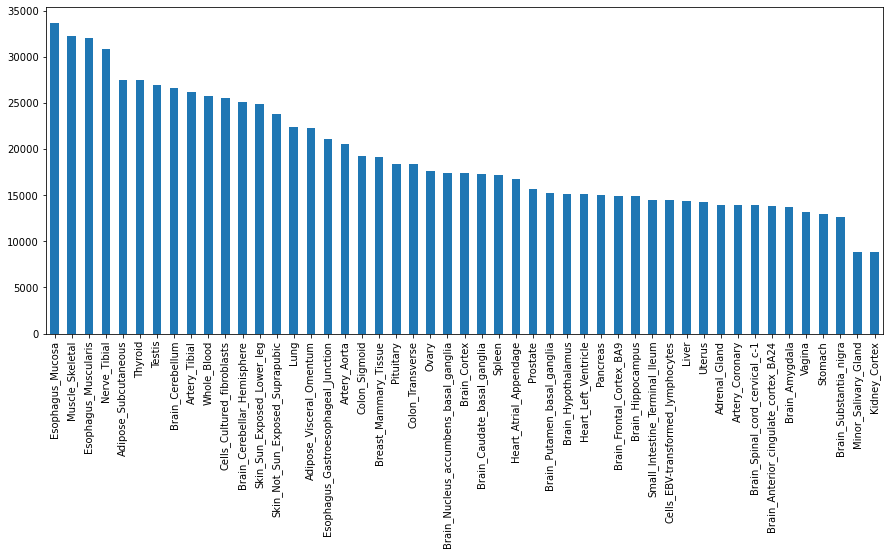

In [2]:
all_eqtl = pd.read_csv('/f/zhangwenwen/project/COVID-19/source/GWAS/grasp/COVID19_GRASP_GTExeQTL_5E-8_all.txt',sep='\t')
all_eqtl['tissueSiteDetailId'].value_counts().plot.bar(figsize=[15,6])

In [3]:
selected_tissues = ['Whole_Blood','Lung']
select_eqtl = all_eqtl[all_eqtl['tissueSiteDetailId'].isin(selected_tissues)]

In [4]:
select_eqtl = select_eqtl.sort_values(['p_GWAS',
                                       'pValue']).drop_duplicates('geneSymbol')

In [6]:
select_eqtl['direction'] = 1
for i in select_eqtl.index:
    gwas_beta, gwas_ea, qtl_beta, qtl_ea = select_eqtl.loc[
        i, ['Beta_GWAS', 'effect_allele', 'normalizedEffectSize', 'variantId']]

    beta = gwas_beta * qtl_beta
    if gwas_ea == qtl_ea.split('_')[-2]:
        direction = beta / abs(beta)
    elif gwas_ea == qtl_ea.split('_')[-3]:
        direction = -beta / abs(beta)
    else:
        direction = 0
    select_eqtl.at[i,'direction'] = direction

In [7]:
select_eqtl['direction'].value_counts()

-1    47
 1    45
 0     2
Name: direction, dtype: int64

In [8]:
select_eqtl.to_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/gwas/gwas_eqtl_direction.xlsx',index=False)

In [9]:
select_eqtl

,CHR,POS(hg19),other_allele,effect_allele,Beta_GWAS,SE_GWAS,p_GWAS,rsid,datasetId,variantId,geneSymbol,gencodeId,tissueSiteDetailId,normalizedEffectSize,pValue,StudyID,direction
3818,3,45889921,A,T,0.489450,0.029534,1.108000e-61,rs35081325,gtex_v8,chr3_45848429_A_T_b38,CCR9,ENSG00000173585.15,Whole_Blood,0.325977,1.628840e-04,COVID19GRASP489,1
8706,3,45960420,G,C,0.344090,0.026014,6.100000e-40,rs1994491,gtex_v8,chr3_45918928_G_C_b38,FLT1P1,ENSG00000229515.1,Whole_Blood,-0.267493,8.598940e-09,COVID19GRASP489,-1
25173,3,46049765,T,C,0.327420,0.026846,3.257000e-34,rs13433997,gtex_v8,chr3_46008273_T_C_b38,CCR3,ENSG00000183625.14,Whole_Blood,-0.207591,1.787290e-05,COVID19GRASP488,-1
42668,3,46108285,C,T,0.318990,0.026900,1.946000e-32,rs9824651,gtex_v8,chr3_46066793_C_T_b38,CXCR6,ENSG00000172215.5,Lung,-0.207118,9.927370e-05,COVID19GRASP488,-1
42669,3,46108285,C,T,0.318990,0.026900,1.946000e-32,rs9824651,gtex_v8,chr3_46066793_C_T_b38,CCR5,ENSG00000160791.13,Lung,-0.157050,1.579700e-04,COVID19GRASP488,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917789,12,42565340,T,C,0.269955,0.048879,3.333838e-08,rs7965273,gtex_v8,chr12_42171538_T_C_b38,RP11-328C8.4,ENSG00000257225.1,Lung,0.343030,1.232050e-07,COVID19GRASP127,1
917720,12,21734159,G,T,-0.448677,0.081869,4.242448e-08,rs2219761,gtex_v8,chr12_21581225_G_T_b38,PYROXD1,ENSG00000121350.15,Lung,0.131418,8.990970e-05,COVID19GRASP348,-1
917714,12,21734159,G,T,-0.448677,0.081869,4.242448e-08,rs2219761,gtex_v8,chr12_21581225_G_T_b38,SPX,ENSG00000134548.9,Whole_Blood,-0.123176,9.119830e-05,COVID19GRASP348,1
918219,17,2276085,G,T,0.535683,0.098208,4.908526e-08,rs3213714,gtex_v8,chr17_2372791_G_T_b38,SGSM2,ENSG00000141258.12,Lung,-0.268298,3.923080e-17,COVID19GRASP475,-1


In [10]:
select_eqtl[select_eqtl['geneSymbol']=='ABO']#['direction'].value_counts()

,CHR,POS(hg19),other_allele,effect_allele,Beta_GWAS,SE_GWAS,p_GWAS,rsid,datasetId,variantId,geneSymbol,gencodeId,tissueSiteDetailId,normalizedEffectSize,pValue,StudyID,direction
106657,9,136132908,T,TC,0.096598,0.009437,1.364000e-24,rs8176719,gtex_v8,chr9_133257521_T_TC_b38,ABO,ENSG00000175164.13,Lung,0.426436,1.837510e-40,COVID19GRASP491,1


In [11]:
all_eqtl

,CHR,POS(hg19),other_allele,effect_allele,Beta_GWAS,SE_GWAS,p_GWAS,rsid,datasetId,variantId,geneSymbol,gencodeId,tissueSiteDetailId,normalizedEffectSize,pValue,StudyID
0,1,91208514,A,C,0.123780,0.022275,2.742000e-08,rs2166172,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP498
1,1,92810430,A,T,3.920000,0.718000,4.840000e-08,rs776701615,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP516
2,1,155105882,T,G,-0.076762,0.013400,1.015000e-08,rs4971066,gtex_v8,chr1_155133406_T_G_b38,DCST2,ENSG00000163354.14,Heart_Left_Ventricle,-0.199303,0.000038,COVID19GRASP490
3,1,155105882,T,G,-0.076762,0.013400,1.015000e-08,rs4971066,gtex_v8,chr1_155133406_T_G_b38,DCST1-AS1,ENSG00000232093.1,Skin_Not_Sun_Exposed_Suprapubic,-0.161117,0.000157,COVID19GRASP490
4,1,155105882,T,G,-0.076762,0.013400,1.015000e-08,rs4971066,gtex_v8,chr1_155133406_T_G_b38,GBAP1,ENSG00000160766.14,Skin_Not_Sun_Exposed_Suprapubic,-0.232311,0.000014,COVID19GRASP490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945241,X,136044918,G,A,7.199591,1.287610,2.251992e-08,rs190856849,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP077
945242,X,143321494,C,A,2.488699,0.452858,3.895183e-08,rs782048630,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP321
945243,X,143463436,T,A,5.172653,0.933733,3.028961e-08,rs781938945,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP181
945244,X,152718054,A,G,6.104888,1.115880,4.477070e-08,rs186165775,gtex_v8,NaN,NaN,NaN,NaN,NaN,NaN,COVID19GRASP296


/f/zhangwenwen/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

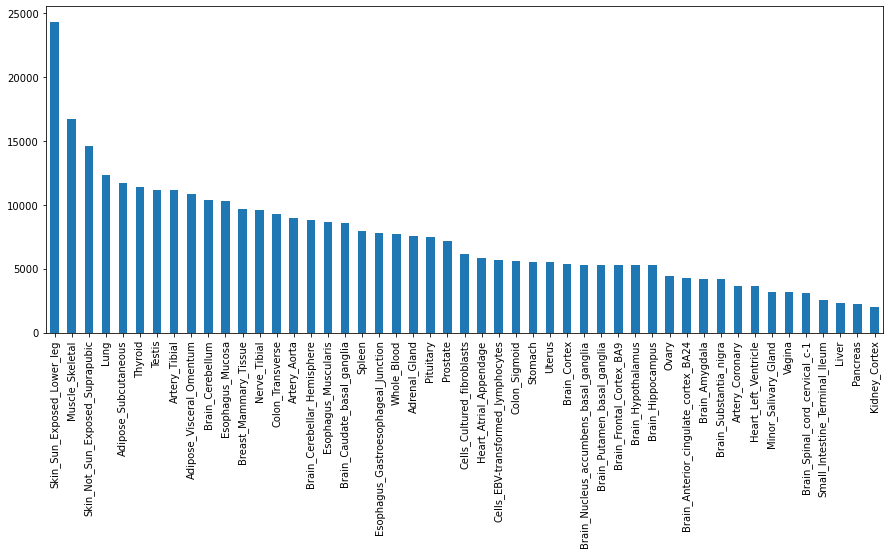

In [12]:
all_sqtl = pd.read_csv('/f/zhangwenwen/project/COVID-19/source/GWAS/grasp/COVID19_GRASP_GTExsQTL_5E-8_all.txt',sep='\t')
all_sqtl['tissueSiteDetailId'].value_counts().plot.bar(figsize=[15,6])

In [13]:
selected_tissues = ['Whole_Blood','Lung']
select_sqtl = all_sqtl[all_sqtl['tissueSiteDetailId'].isin(selected_tissues)]
select_sqtl = select_sqtl.sort_values(['p_GWAS',
                                       'pValue']).drop_duplicates('geneSymbol')

In [14]:
select_sqtl['direction'] = 1
for i in select_sqtl.index:
    gwas_beta, gwas_ea, qtl_beta, qtl_ea = select_sqtl.loc[
        i, ['Beta_GWAS', 'effect_allele', 'nes', 'variantId']]

    beta = gwas_beta * qtl_beta
    if gwas_ea == qtl_ea.split('_')[-2]:
        direction = beta / abs(beta)
    elif gwas_ea == qtl_ea.split('_')[-3]:
        direction = -beta / abs(beta)
    else:
        direction = 0
    select_eqtl.at[i,'direction'] = direction

In [15]:
select_sqtl.to_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/gwas/gwas_sqtl_direction.xlsx',index=False)

In [16]:
select_sqtl

,CHR,POS(hg19),other_allele,effect_allele,Beta_GWAS,SE_GWAS,p_GWAS,rsid,StudyID,chromosome,...,geneSymbol,geneSymbolUpper,nes,pValue,phenotypeId,pos,snpId,tissueSiteDetailId,variantId,direction
4003,3,45960420,G,C,0.344090,0.026014,6.100000e-40,rs1994491,COVID19GRASP489,chr3,...,FYCO1,FYCO1,-0.555516,2.664670e-07,chr3:45919065:45919413:clu_46920:ENSG000001638...,45918928.0,rs1994491,Lung,chr3_45918928_G_C_b38,1
59221,9,136132908,T,TC,0.096598,0.009437,1.364000e-24,rs8176719,COVID19GRASP491,chr9,...,ABO,ABO,-0.588585,6.459030e-20,chr9:133251152:133252478:clu_63938:ENSG0000017...,133257521.0,rs8176719,Lung,chr9_133257521_T_TC_b38,1
360249,21,34615210,T,C,-0.147470,0.016997,4.108000e-18,rs13050728,COVID19GRASP489,chr21,...,IFNAR2,IFNAR2,0.329154,7.351580e-26,chr21:33246482:33246718:clu_25445:ENSG00000159...,33242905.0,rs13050728,Whole_Blood,chr21_33242905_T_C_b38,1
58366,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,HLA-L,HLA-L,1.836890,1.473460e-115,chr6:29829693:30261587:clu_28717:ENSG000002437...,31153649.0,rs143334143,Whole_Blood,chr6_31153649_G_A_b38,1
58417,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,TCF19,TCF19,1.226440,2.990890e-28,chr6:31158722:31159143:clu_37654:ENSG000001373...,31153649.0,rs143334143,Lung,chr6_31153649_G_A_b38,1
58367,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,HLA-E,HLA-E,0.778694,1.487590e-13,chr6:30007593:30491137:clu_28725:ENSG000002045...,31153649.0,rs143334143,Whole_Blood,chr6_31153649_G_A_b38,1
58368,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,HLA-S,HLA-S,0.663870,1.208140e-09,chr6:31269173:31382241:clu_28830:ENSG000002258...,31153649.0,rs143334143,Whole_Blood,chr6_31153649_G_A_b38,1
58416,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,PSORS1C1,PSORS1C1,-0.709230,1.928510e-09,chr6:31114891:31125739:clu_37643:ENSG000002045...,31153649.0,rs143334143,Lung,chr6_31153649_G_A_b38,1
58369,6,31121426,G,A,0.453450,0.054153,5.596000e-17,rs143334143,COVID19GRASP503,chr6,...,MICA,MICA,0.509147,5.350860e-07,chr6:31400763:31410543:clu_28873:ENSG000002045...,31153649.0,rs143334143,Whole_Blood,chr6_31153649_G_A_b38,1
96753,12,113381956,C,T,0.189360,0.026007,3.308000e-13,rs2269899,COVID19GRASP485,chr12,...,OAS1,OAS1,-1.533510,7.145710e-134,chr12:112917700:112919389:clu_4534:ENSG0000008...,112944151.0,rs2269899,Whole_Blood,chr12_112944151_C_T_b38,1


In [17]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import matplotlib as mpl
mpl.rcParams['font.serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

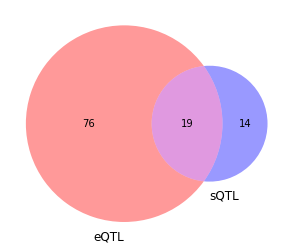

In [18]:
list_a = select_eqtl['geneSymbol'].values
list_b = select_sqtl['geneSymbol'].values

f, ax = plt.subplots( figsize=(5,5))
venn2([set(list_a),set(list_b)],
      ax=ax,
      set_colors=('r', 'b'),
      set_labels=('eQTL', 'sQTL'),)

In [19]:
egene_direction = pd.Series(index=select_eqtl['geneSymbol'].values,
                            data=select_eqtl['direction'].values)
sgene_direction = pd.Series(index=select_sqtl['geneSymbol'].values,
                            data=select_sqtl['direction'].values)

for gene in egene_direction.index:
    if gene in sgene_direction.index:
        print(int(egene_direction[gene]), sgene_direction[gene], gene)

-1 1 CCR3
1 1 ABO
-1 1 IFNAR2
1 1 TCF19
-1 1 PSORS1C1
-1 1 FYCO1
-1 1 OAS1
1 1 MAN2C1
1 1 LRRC37A4P
-1 1 LINC02210
-1 1 ARL17A
-1 1 KANSL1
-1 1 PLEKHM1
-1 1 CYP21A2
1 1 CYP21A1P
1 1 HLA-DQB1
-1 1 HLA-DQB2
-1 1 TAPBP
-1 1 SGSM2
